In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/impact-of-screen-time-on-mental-health/digital_diet_mental_health.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/impact-of-screen-time-on-mental-health/digital_diet_mental_health.csv")

In [4]:
data.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


In [5]:
data.shape

(2000, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

In [7]:
data.describe()

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,mood_rating,stress_level,physical_activity_hours_per_week,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000
mean,38.805500,6.025600,3.023700,1.999950,0.995650,1.503700,2.039200,2.010250,2.46735,1.2795,...,5.591000,5.541500,3.087150,49.650500,0.387500,0.507500,148.07970,9.887500,10.04900,10.753750
std,14.929203,1.974123,1.449399,0.997949,0.492714,0.959003,1.133435,1.116111,1.23686,0.8945,...,2.899814,2.885731,1.885258,17.546717,0.487301,0.500069,48.86066,6.027853,6.05334,7.340269
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,...,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.80000,0.000000,0.00000,0.000000
25%,26.000000,4.700000,2.000000,1.300000,0.600000,0.800000,1.200000,1.200000,1.60000,0.6000,...,3.000000,3.000000,1.600000,35.000000,0.000000,0.000000,113.90000,5.000000,5.00000,4.900000
50%,39.000000,6.000000,3.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.40000,1.2000,...,6.000000,6.000000,3.000000,49.000000,0.000000,1.000000,147.45000,10.000000,10.00000,10.400000
75%,51.000000,7.325000,4.000000,2.700000,1.300000,2.200000,2.800000,2.800000,3.30000,1.9000,...,8.000000,8.000000,4.400000,64.250000,1.000000,1.000000,180.70000,15.000000,15.00000,15.800000
max,64.000000,13.300000,8.400000,5.600000,2.500000,4.700000,5.800000,5.900000,6.80000,4.0000,...,10.000000,10.000000,9.700000,80.000000,1.000000,1.000000,364.90000,20.000000,20.00000,36.400000


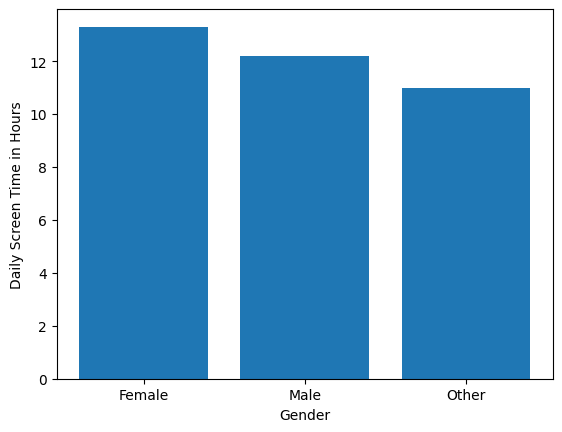

In [8]:
plt.bar(data["gender"], data["daily_screen_time_hours"])
plt.xlabel("Gender")
plt.ylabel("Daily Screen Time in Hours")
plt.show()

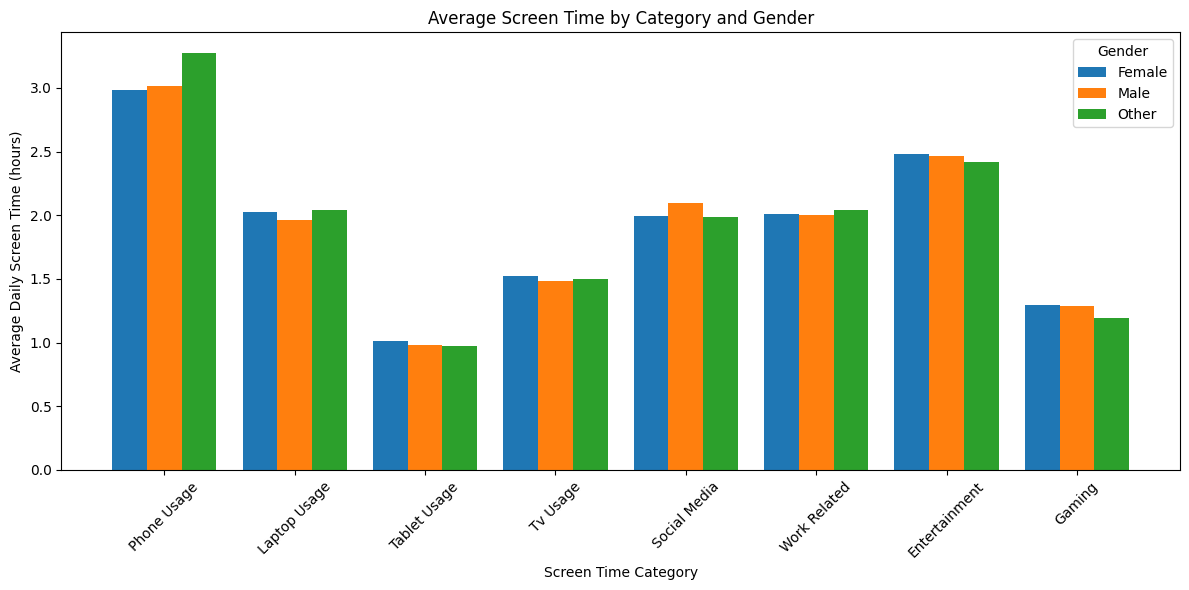

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define screen time categories
categories = ['phone_usage_hours','laptop_usage_hours','tablet_usage_hours',
              'tv_usage_hours','social_media_hours','work_related_hours',
              'entertainment_hours','gaming_hours']

# Group by gender and calculate mean
grouped = data.groupby('gender')[categories].mean()

# Get all unique gender labels
genders = grouped.index.tolist()

# Bar positioning
x = np.arange(len(categories))
width = 0.8 / len(genders)  # divide space equally for each gender

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each gender and plot bars
for i, gender in enumerate(genders):
    offset = (i - len(genders)/2) * width + width/2
    ax.bar(x + offset, grouped.loc[gender].values, width, label=gender)

# Labeling
ax.set_xlabel('Screen Time Category')
ax.set_ylabel('Average Daily Screen Time (hours)')
ax.set_title('Average Screen Time by Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels([cat.replace('_hours', '').replace('_', ' ').title() for cat in categories], rotation=45)
ax.legend(title="Gender")

plt.tight_layout()
plt.show()


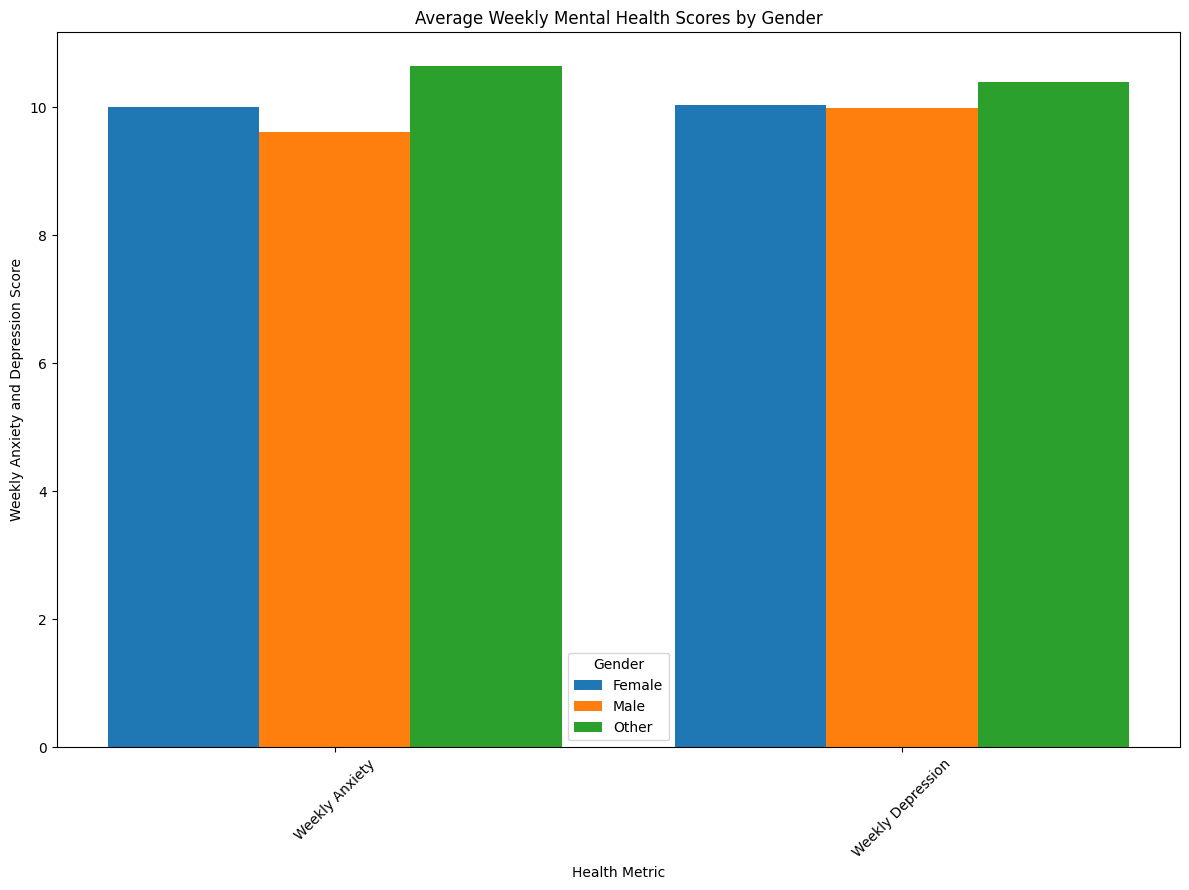

In [10]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['weekly_anxiety_score', 'weekly_depression_score']

# Group by gender and calculate the mean scores
group = data.groupby('gender')[categories].mean()

# Extract gender labels
genders = group.index.tolist()

# Prepare x-axis positions and bar width
x = np.arange(len(categories))
width = 0.8 / len(genders)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))

# Plot bars for each gender
for i, gender in enumerate(genders):
    offset = (i - len(genders)/2) * width + width/2
    ax.bar(x + offset, group.loc[gender].values, width, label=gender)

# Add labels and legend
ax.set_xlabel('Health Metric')
ax.set_ylabel('Weekly Anxiety and Depression Score')
ax.set_title('Average Weekly Mental Health Scores by Gender')
ax.set_xticks(x)
ax.set_xticklabels([cat.replace('_score', '').replace('_', ' ').title() for cat in categories], rotation=45)
ax.legend(title="Gender")

plt.tight_layout()
plt.show()


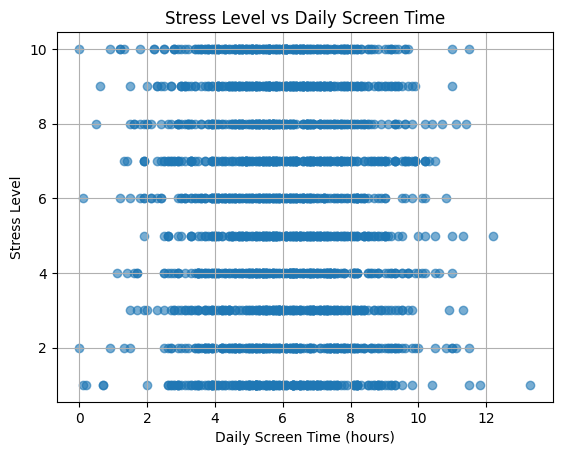

In [11]:
plt.scatter(data['daily_screen_time_hours'], data['stress_level'], alpha=0.6)
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Stress Level")
plt.title("Stress Level vs Daily Screen Time")
plt.grid(True)
plt.show()


This graphs does not show a strong linear corelation between the stress level and screen on time.
Meaning, a person with lower screen on time also can have a high stress level. 

In [12]:
corr = data['daily_screen_time_hours'].corr(data['stress_level'])
print(f"Correlation: {corr}")


Correlation: -0.024150658188012833


The result of the above correlation shows that stress level is independent of the screen on time. As the value is close to zero indicating no relation. 

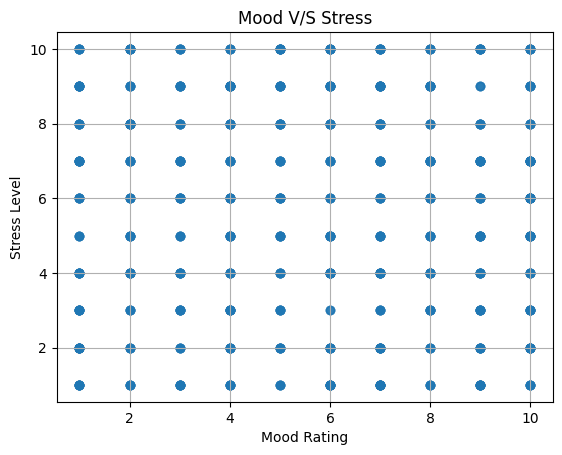

In [13]:
plt.scatter(data['mood_rating'],data['stress_level'],alpha=0.3)
plt.xlabel("Mood Rating")
plt.ylabel("Stress Level")
plt.title("Mood V/S Stress")
plt.grid(True)
plt.show()

In [14]:
corr = data['mood_rating'].corr(data['stress_level'])
print(corr)

-0.01584506174145752


Even this, there is no sign of good correlation between the mood_rating and the stress_level column. - the correlation value result - -0.015845061741457497.

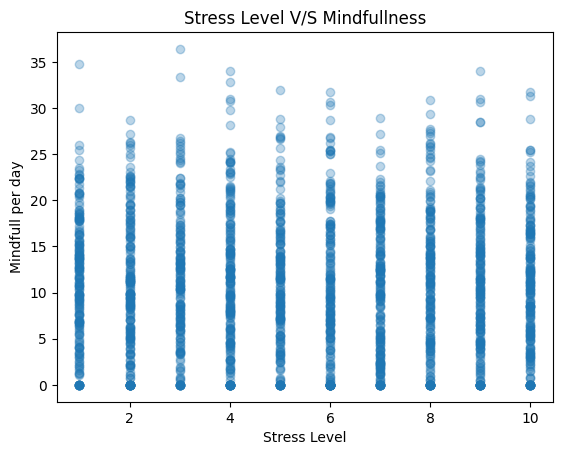

In [15]:
plt.scatter(data['stress_level'], data['mindfulness_minutes_per_day'],alpha=0.3)
plt.xlabel('Stress Level')
plt.ylabel('Mindfull per day')
plt.title('Stress Level V/S Mindfullness')
plt.show()

In [16]:
corr = data['stress_level'].corr(data['mindfulness_minutes_per_day'])
print(corr)

-0.029433774887758526


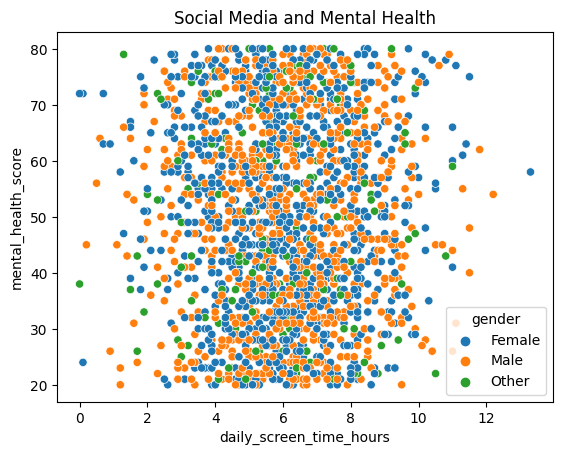

In [17]:
import seaborn as sns

sns.scatterplot(x='daily_screen_time_hours', y='mental_health_score', data=data, hue='gender')
plt.title('Social Media and Mental Health')
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['gender_encoded'] = le.fit_transform(data['gender'])

# Check encoding
print(le.classes_)  # e.g., ['Female', 'Male', 'Other']
print(data[['gender', 'gender_encoded']].head())

['Female' 'Male' 'Other']
   gender  gender_encoded
0  Female               0
1    Male               1
2   Other               2
3   Other               2
4    Male               1


In [19]:
data['location_encoded'] = le.fit_transform(data['location_type'])

print(le.classes_)  # Output might be: ['Rural', 'Suburban', 'Urban']
print(data[['location_type', 'location_encoded']].head())

['Rural' 'Suburban' 'Urban']
  location_type  location_encoded
0         Urban                 2
1      Suburban                 1
2      Suburban                 1
3         Rural                 0
4         Urban                 2


In [20]:
data['gender'] = data['gender_encoded']
data.drop(columns='gender_encoded', inplace=True)

data['location_type'] = data['location_encoded']
data.drop(columns='location_encoded', inplace=True)

In [21]:
data.head()


,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,0,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,2,32,1,1,125.2,13,15,4.0
1,user_2,64,1,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,1,75,0,1,150.4,19,18,6.5
2,user_3,41,2,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,1,22,0,0,187.9,7,3,6.9
3,user_4,27,2,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,0,22,0,1,73.6,7,2,4.8
4,user_5,55,1,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,2,64,1,1,217.5,8,10,0.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   int64  
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

In [23]:
features = data.drop(columns=['mental_health_score','user_id'], axis=1)
targets = data['mental_health_score']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

In [25]:
print(features.shape,X_train.shape,X_test.shape)

(2000, 23) (1600, 23) (400, 23)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    
    rmse = mean_squared_error(y_train, pred, squared=False)
    r2 = r2_score(y_train, pred)
    
    results.append((name, rmse, r2))

# Print results
for name, rmse, r2 in results:
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")


Linear Regression: RMSE = 17.50, R² = 0.01
Random Forest Regressor: RMSE = 6.74, R² = 0.85
Gradient Boosting Regressor: RMSE = 14.86, R² = 0.29
SVR: RMSE = 17.58, R² = 0.00
